In [1]:
%matplotlib inline
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

In [5]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom
import pandas as pd
import numpy as np

from minavrfpy import lib

## single epoch

In [6]:
epoch = 20
bp_key = "B62qob1tGxx1BhychEzzah7yvdbRH3E7SNSTrEtkuSZzR2UBezMChg2"

results = lib.get_epoch_df(epoch, block_producer_key=bp_key)

df = results['df']
stakes_df = results['stakes_df']

## data quick look

In [7]:
results.keys()

dict_keys(['df', 'total_time', 'stakes_df', 'winner_df', 'my_winner_df', 'epoch_data'])

In [8]:
df.head()

,epoch,slot,global_slot,block,winner_exists,saw_my_producer,bp_won,block_time,received_time,winner_pk,super_charged,block_height_equal,too_late,min_bt,min_bt_minutes,outcome,next_block_in
0,20,141,142941,97983,True,True,True,[0 days 00:02:23.710000],2022-01-08 19:05:23.710000+00:00,B62qnSdNzb8icjWPiSsxgKfB1RvD47wLf9aYfVRd3HYTk5...,False,True,False,0 days 00:02:23.710000,2.383333,WON,NaT
1,20,1214,144014,98482,True,True,True,[0 days 00:02:11.143000],2022-01-11 00:44:11.143000+00:00,B62qnSdNzb8icjWPiSsxgKfB1RvD47wLf9aYfVRd3HYTk5...,False,True,False,0 days 00:02:11.143000,2.183333,WON,NaT
2,20,1722,144522,98805,True,True,True,[0 days 00:02:05.452000],2022-01-12 02:08:05.452000+00:00,B62qnSdNzb8icjWPiSsxgKfB1RvD47wLf9aYfVRd3HYTk5...,False,True,False,0 days 00:02:05.452000,2.083333,WON,NaT
3,20,1739,144539,98817,True,True,True,[0 days 00:02:07.573000],2022-01-12 02:59:07.573000+00:00,B62qm4TntJySX6ktHD1SsYumBdvSTp8pLdjMwTVjBrmA3i...,False,True,False,0 days 00:02:07.573000,2.116667,WON,NaT
4,20,2047,144847,99044,True,True,False,[0 days 00:03:25.124000],2022-01-12 18:36:36.576000+00:00,B62qm4TntJySX6ktHD1SsYumBdvSTp8pLdjMwTVjBrmA3i...,False,True,True,0 days 00:03:25.124000,3.416667,LOST,NaT


In [9]:
df.shape

(28, 17)

In [10]:
stakes_df.head()

,balance,public_key,timing_timed_weighting,timing
0,1.287163e+06,B62qm4TntJySX6ktHD1SsYumBdvSTp8pLdjMwTVjBrmA3i...,0.0,NaN
1,9.646882e+05,B62qnSdNzb8icjWPiSsxgKfB1RvD47wLf9aYfVRd3HYTk5...,0.0,NaN
2,8.904433e+05,B62qk9RQQsLpE1i1CJjkN6SuoRefXg5X17kqvvZV2UMysW...,0.0,NaN
3,6.445618e+05,B62qjxgReuj5FKdrMw3i7d9A4yjwTvu8mr9roy9f6AUAt1...,0.0,NaN
4,6.600000e+04,B62qjVX9MmfxajW5kBPjQgkTcs32MJHtydXfVdtCs1qk28...,0.0,NaN


In [11]:
df.winner_pk.value_counts()

B62qm4TntJySX6ktHD1SsYumBdvSTp8pLdjMwTVjBrmA3ipkWejBdbe    10
B62qnSdNzb8icjWPiSsxgKfB1RvD47wLf9aYfVRd3HYTk519fhG8RUK     9
B62qk9RQQsLpE1i1CJjkN6SuoRefXg5X17kqvvZV2UMysW4hr9CCoFw     6
B62qjxgReuj5FKdrMw3i7d9A4yjwTvu8mr9roy9f6AUAt1orHEArLhC     3
Name: winner_pk, dtype: int64

In [12]:
df[df.outcome == 'FUTURE'][['winner_pk', 'super_charged', 'next_block_in']]

,winner_pk,super_charged,next_block_in
26,B62qm4TntJySX6ktHD1SsYumBdvSTp8pLdjMwTVjBrmA3i...,False,1 days 06:45:00
27,B62qm4TntJySX6ktHD1SsYumBdvSTp8pLdjMwTVjBrmA3i...,False,1 days 08:51:00


## outcome per epoch

<AxesSubplot:xlabel='epoch', ylabel='outcome_count'>

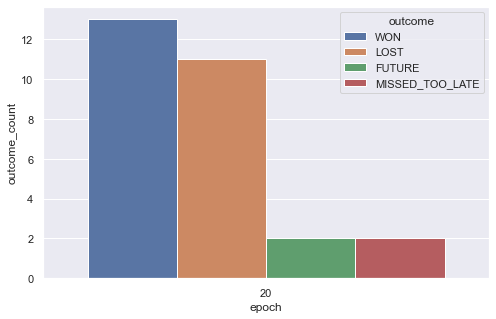

In [13]:
sns.set(rc={"figure.figsize": (8, 5)})


counts_df = (
    df.groupby("epoch")
    .outcome.value_counts()
    .to_frame()
    .rename(columns={"outcome": "outcome_count"})
    .reset_index()
)

sns.barplot(x="epoch", y="outcome_count", data=counts_df, hue="outcome")

## outcome grouped by super_charged

In [14]:
df.groupby(["epoch", "super_charged"]).outcome.value_counts()

epoch  super_charged  outcome        
20     False          WON                13
                      LOST               11
                      FUTURE              2
                      MISSED_TOO_LATE     2
Name: outcome, dtype: int64

## slot luck - example of a super unlucky epoch
try to visualize "slot luck"

epoch 20 - expected 43 slots - got 28... 


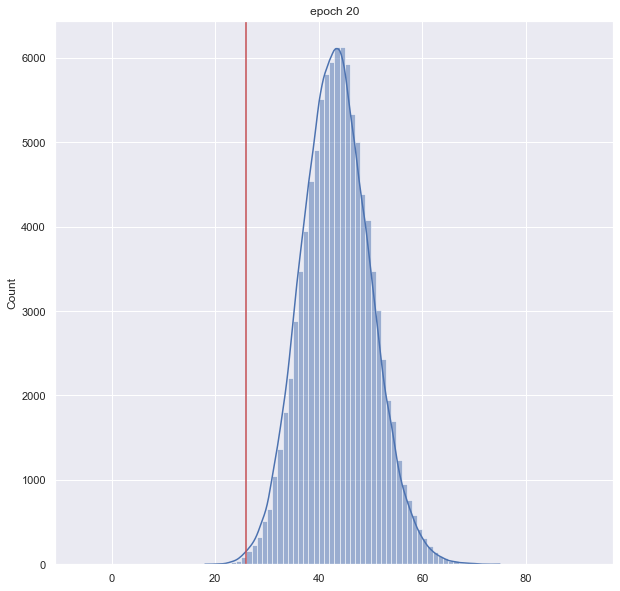

<Figure size 576x360 with 0 Axes>

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

SLOTS_PER_EPOCH = 7140

def get_slot_win_perc(stake, total_currency):
    return (1 - ((1 / 4) ** (stake / total_currency)))


epoch_data = []

total_currency = results['epoch_data']['total_currency']
total_staking_balance = results['stakes_df'].balance.sum()

slot_win_pct = get_slot_win_perc(
    total_staking_balance, total_currency
)    
expected_blocks_value = slot_win_pct * SLOTS_PER_EPOCH 

won_blocks = df[(df.epoch == epoch) & (df.outcome == 'WON')].block.count()
slots_won = df[(df.epoch == epoch)].slot.nunique()

data = binom.rvs(n=SLOTS_PER_EPOCH, p=slot_win_pct, size=100000)

k = np.arange(int(expected_blocks_value - 50), int(expected_blocks_value) + 50, 1)

plt.figure(epoch)

sns.histplot(data, kde=True, bins=k, ax=ax)
ax.axvline(df[(df.epoch == epoch)].block.nunique(), 0, 1, color="r")
ax.set_title(f"epoch {epoch}")

epoch_data.append({
    'epoch': epoch,
    'expected_slots': expected_blocks_value,
    'expected_slots_binom': binom(SLOTS_PER_EPOCH, slot_win_pct).expect(),
    'slot_win_pct': slot_win_pct,
    'won_slots': slots_won,
    'won_blocks': won_blocks,
    'orphan_rate': 1 - (won_blocks/slots_won)
})

print(f"epoch {epoch} - expected {round(expected_blocks_value)} slots - got {slots_won}... ")


plt.show()

In [18]:
# this us SUPER unlucky

epoch_slots_df = pd.DataFrame(epoch_data)

epoch_slots_df["cdf"] = epoch_slots_df.apply(
    lambda row: binom.cdf(row["won_slots"], SLOTS_PER_EPOCH, row["slot_win_pct"]),
    axis=1,
)
epoch_slots_df

,epoch,expected_slots,expected_slots_binom,slot_win_pct,won_slots,won_blocks,orphan_rate,cdf
0,20,43.360313,43.360313,0.006073,28,13,0.535714,0.008468
